In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import gensim
from gensim import corpora
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/aadhilmsyed839/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocess the content column
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]
    return ' '.join(tokens)

In [6]:
# Load your CSV file
data = pd.read_csv('china_briefing_articles2.csv')

# Process the Content
data['preprocessed_content'] = data['content'].apply(preprocess_text)
data['processed_content'] = data['content'].apply(preprocess_text)
display(data.head())

,section,title,link,content,date,author,preprocessed_content,processed_content
0,Industries,China’s EdTech Market: Growth Trajectories and...,https://www.china-briefing.com/news/chinas-edt...,China’s EdTech Market: Growth Trajectories and...,"October 22, 2024",China Briefing,china ’ edtech market growth trajectories futu...,china ’ edtech market growth trajectories futu...
1,Industries,Unlocking China’s V2G Potential: Opportunities...,https://www.china-briefing.com/news/unlocking-...,Unlocking China’s V2G Potential: Opportunities...,"October 10, 2024",China Briefing,unlocking china ’ v2g potential opportunities ...,unlocking china ’ v2g potential opportunities ...
2,Industries,Navigating China’s F&B Market: Key Growth Tren...,https://www.china-briefing.com/news/navigating...,Navigating China’s F&B Market: Key Growth Tren...,"September 25, 2024",China Briefing,navigating china ’ f b market key growth trend...,navigating china ’ f b market key growth trend...
3,Industries,Exploring China’s Leading AI Hubs: A Regional ...,https://www.china-briefing.com/news/exploring-...,Exploring China’s Leading AI Hubs: A Regional ...,"September 3, 2024",China Briefing,exploring china ’ leading ai hubs regional ana...,exploring china ’ leading ai hubs regional ana...
4,Industries,Why Use a Separate Domain Name for your China ...,https://www.china-briefing.com/news/why-use-a-...,Why Use a Separate Domain Name for your China ...,"August 5, 2024",China Briefing,use separate domain name china business august...,use separate domain name china business august...


In [7]:
# Save the dataset
data.to_csv("cn_articles.csv", index = False)
print("Articles Dataset saved successfully!")

Articles Dataset saved successfully!


In [8]:
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize, remove stopwords, and lowercase
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return words

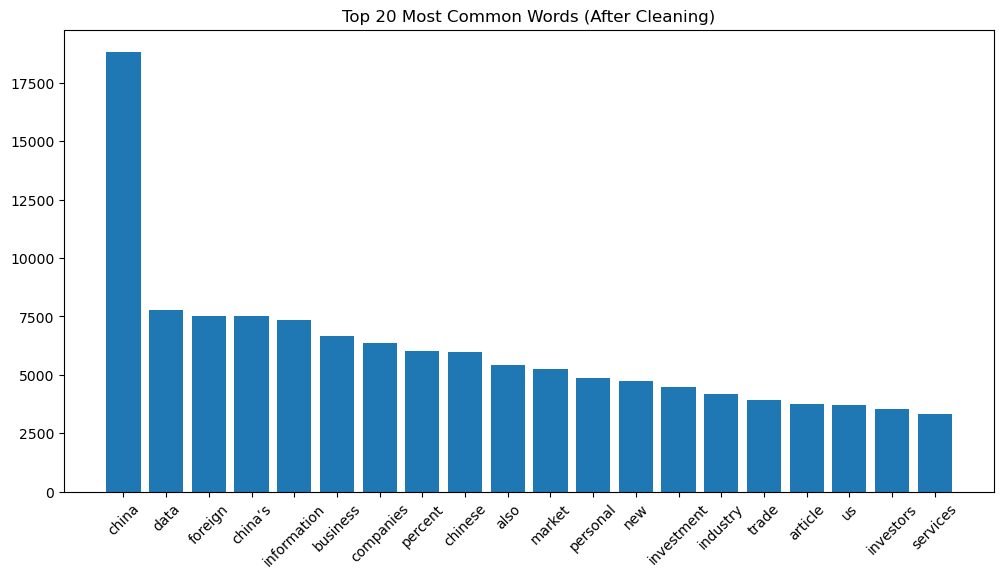

In [9]:
# Apply the cleaning function to the 'content' column and flatten the list of words
all_words = [word for content in data['content'].dropna() for word in clean_text(content)]

# Count word frequencies
word_counts = Counter(all_words)
top_words = word_counts.most_common(20)

# Prepare data for plotting
words, counts = zip(*top_words)

# Plot the top words
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title("Top 20 Most Common Words (After Cleaning)")
plt.xticks(rotation=45)
plt.savefig("cn_articles_common_words.png", dpi=300)  # Save plot as PNG
plt.show()

In [10]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the content
data['sentiment'] = data['content'].apply(lambda x: sid.polarity_scores(x)['compound'])
data

,section,title,link,content,date,author,preprocessed_content,processed_content,sentiment
0,Industries,China’s EdTech Market: Growth Trajectories and...,https://www.china-briefing.com/news/chinas-edt...,China’s EdTech Market: Growth Trajectories and...,"October 22, 2024",China Briefing,china ’ edtech market growth trajectories futu...,china ’ edtech market growth trajectories futu...,0.9999
1,Industries,Unlocking China’s V2G Potential: Opportunities...,https://www.china-briefing.com/news/unlocking-...,Unlocking China’s V2G Potential: Opportunities...,"October 10, 2024",China Briefing,unlocking china ’ v2g potential opportunities ...,unlocking china ’ v2g potential opportunities ...,0.9997
2,Industries,Navigating China’s F&B Market: Key Growth Tren...,https://www.china-briefing.com/news/navigating...,Navigating China’s F&B Market: Key Growth Tren...,"September 25, 2024",China Briefing,navigating china ’ f b market key growth trend...,navigating china ’ f b market key growth trend...,0.9996
3,Industries,Exploring China’s Leading AI Hubs: A Regional ...,https://www.china-briefing.com/news/exploring-...,Exploring China’s Leading AI Hubs: A Regional ...,"September 3, 2024",China Briefing,exploring china ’ leading ai hubs regional ana...,exploring china ’ leading ai hubs regional ana...,1.0000
4,Industries,Why Use a Separate Domain Name for your China ...,https://www.china-briefing.com/news/why-use-a-...,Why Use a Separate Domain Name for your China ...,"August 5, 2024",China Briefing,use separate domain name china business august...,use separate domain name china business august...,0.9998
...,...,...,...,...,...,...,...,...,...
836,Legal & Regulatory,Labeling Cosmetics in China: New Regulatory St...,https://www.china-briefing.com/news/labeling-c...,Labeling Cosmetics in China: New Regulatory St...,"June 16, 2021",China Briefing,labeling cosmetics china new regulatory standa...,labeling cosmetics china new regulatory standa...,0.9882
837,Legal & Regulatory,China Eases Foreign Ownership Restrictions for...,https://www.china-briefing.com/news/china-ease...,China Eases Foreign Ownership Restrictions for...,"June 15, 2021",China Briefing,china eases foreign ownership restrictions the...,china eases foreign ownership restrictions the...,0.9962
838,Legal & Regulatory,China Passes the Anti-Foreign Sanctions Law to...,https://www.china-briefing.com/news/chinas-ant...,China Passes the Anti-Foreign Sanctions Law to...,"June 11, 2021",China Briefing,china passes anti-foreign sanctions law counte...,china passes anti-foreign sanctions law counte...,0.9423
839,Legal & Regulatory,Personal Data Regulation in China: Personal In...,https://www.china-briefing.com/news/personal-d...,Personal Data Regulation in China: Personal In...,"May 13, 2021",China Briefing,personal data regulation china personal inform...,personal data regulation china personal inform...,0.9950


In [11]:
# Save the dataset
data.to_csv("cn_articles.csv", index = False)
print("Articles Dataset saved successfully!")

Articles Dataset saved successfully!


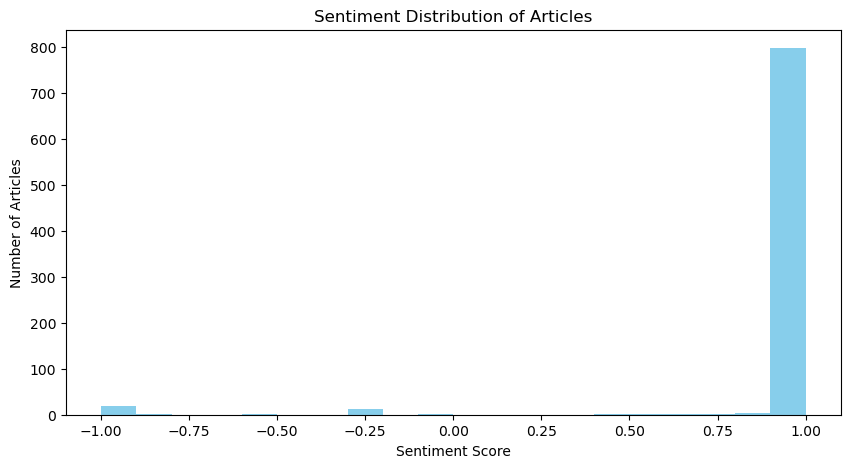

In [12]:
# Visualize the distribution of sentiments
plt.figure(figsize=(10, 5))
plt.hist(data['sentiment'], bins=20, color='skyblue')
plt.title("Sentiment Distribution of Articles")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.savefig("cn_articles_sentiment_distribution.png", dpi=300)  # Save plot as PNG
plt.show()

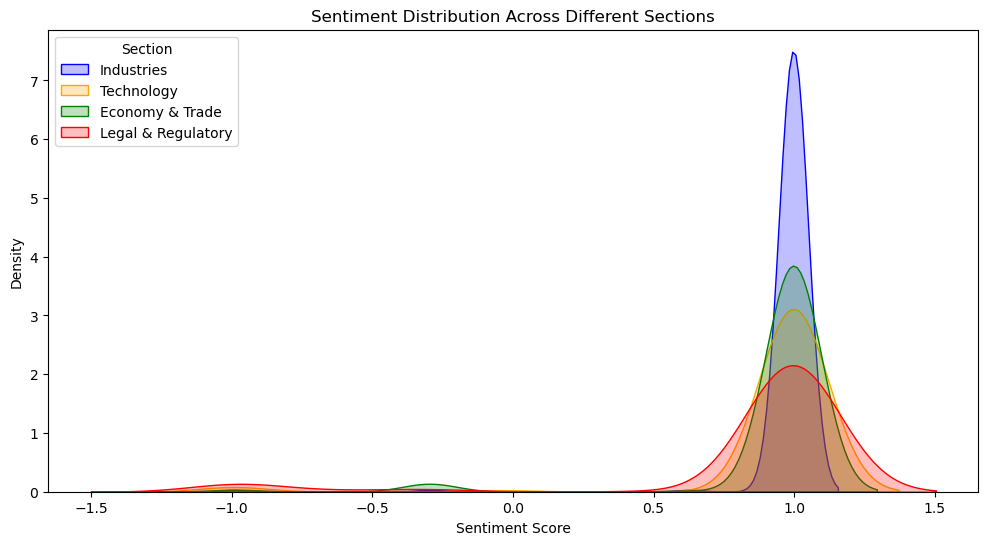

In [13]:
# Define a color palette for each section
section_palette = {
    "Industries": "blue",
    "Technology": "orange",
    "Economy & Trade": "green",
    "Legal & Regulatory": "red"
}

# Plot sentiment distribution with KDE plots for each section
plt.figure(figsize=(12, 6))

# Plot each section separately and store the color used
for section, color in section_palette.items():
    subset = data[data['section'] == section]
    sns.kdeplot(subset['sentiment'], label=section, color=color, fill=True)

# Add labels, title, and a legend
plt.title("Sentiment Distribution Across Different Sections")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend(title="Section")
plt.savefig("cn_articles_sentiment_by_section.png", dpi=300)  # Save plot as PNG
plt.show()

In [14]:
# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Step 1: Keyword Frequency Analysis
def count_keyword_frequency(data, keyword):
    keyword_counts = data['content'].str.contains(keyword, case=False).sum()
    print(f"The keyword '{keyword}' appears in {keyword_counts} articles.")

# Check frequency of "AI"
count_keyword_frequency(data, "AI")

The keyword 'AI' appears in 828 articles.


In [15]:
# Step 2: Preprocess content for LDA
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

In [16]:
# Process the data
data['processed_content'] = data['content'].apply(preprocess_text)

# Save the dataset
data.to_csv("cn_articles.csv", index = False)
print("Articles Dataset saved successfully!")

Articles Dataset saved successfully!


In [17]:
# Step 3: Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(data['processed_content'])
corpus = [dictionary.doc2bow(text) for text in data['processed_content']]

# Step 4: Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10, random_state=42)

# Step 5: Display the topics with top words
topics = lda_model.print_topics(num_words=5)
print("Top topics discovered by LDA:")
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

Top topics discovered by LDA:
Topic 1: 0.030*"data" + 0.020*"china" + 0.008*"security" + 0.007*"company" + 0.007*"measure"
Topic 2: 0.027*"china" + 0.013*"industry" + 0.009*"market" + 0.008*"development" + 0.008*"ha"
Topic 3: 0.021*"china" + 0.014*"company" + 0.013*"business" + 0.012*"foreign" + 0.006*"investment"
Topic 4: 0.033*"china" + 0.014*"u" + 0.013*"percent" + 0.009*"chinese" + 0.008*"trade"
Topic 5: 0.033*"information" + 0.024*"personal" + 0.017*"company" + 0.017*"data" + 0.014*"china"


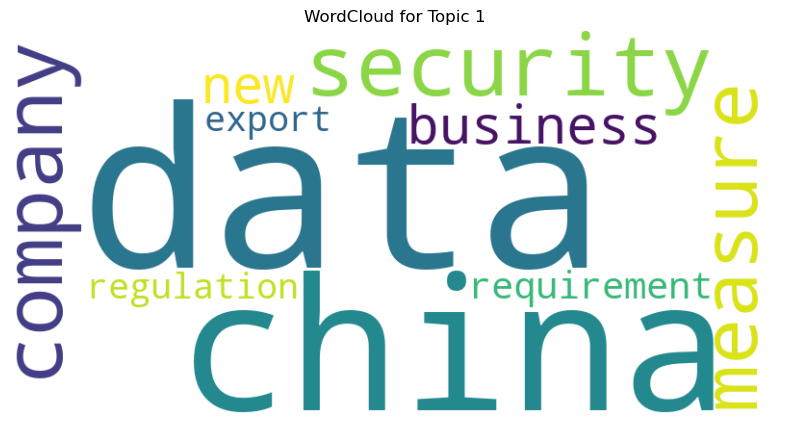

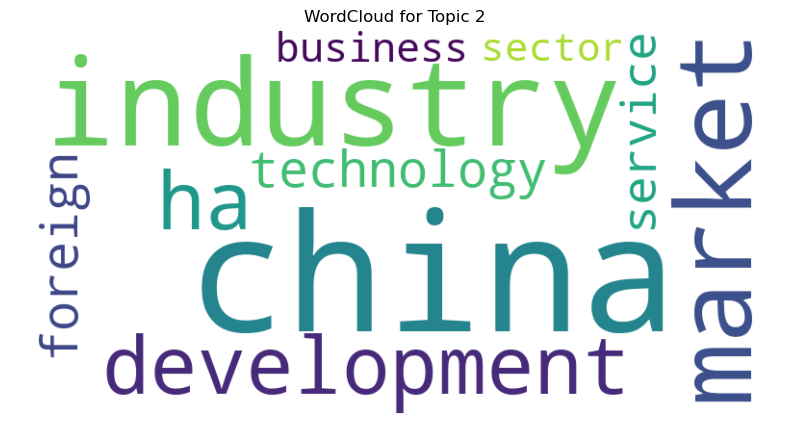

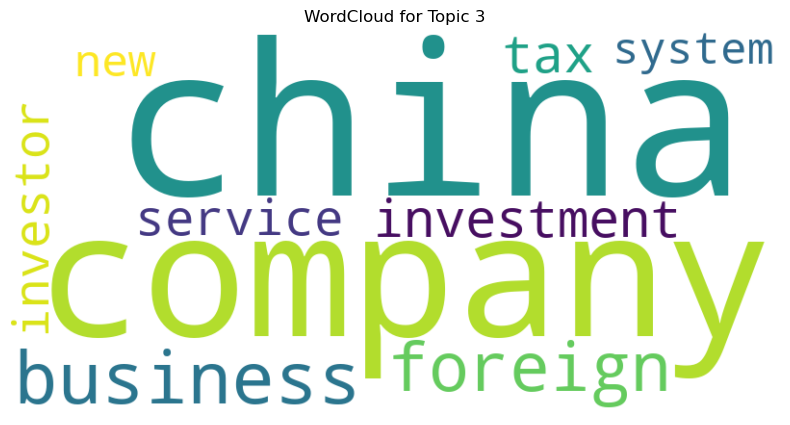

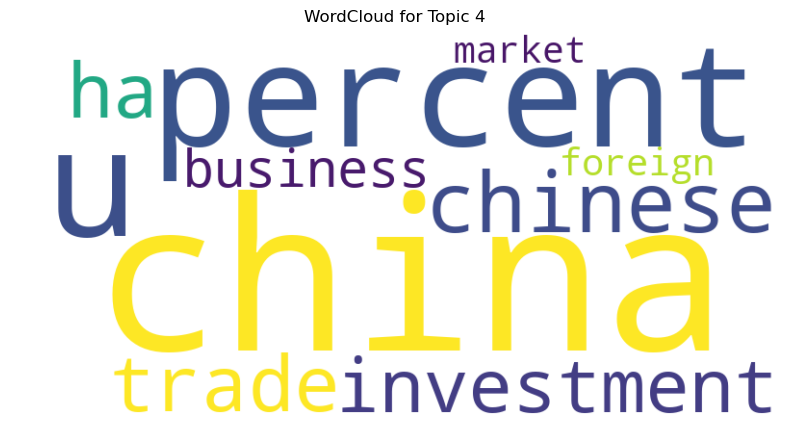

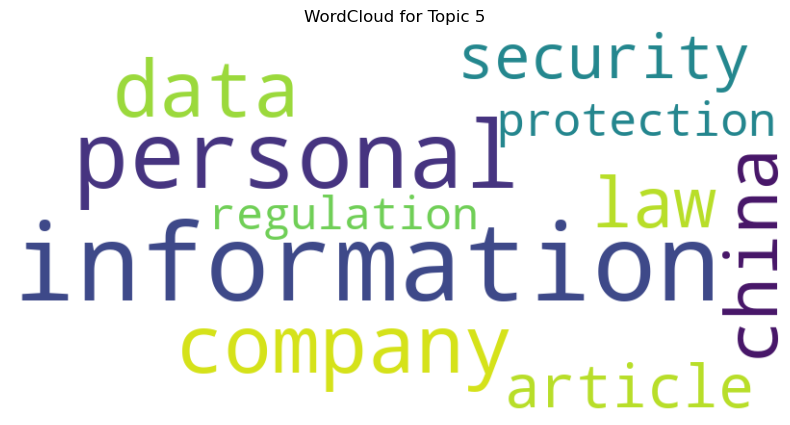

In [18]:
# Step 6: Visualize the topics with WordCloud
for idx, topic in topics:
    words = dict(lda_model.show_topic(idx, 10))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for Topic {idx + 1}")
    plt.savefig(f"cn_articles_wordcloud_topic{idx + 1}", dpi=300)
    plt.show()

In [19]:
# Define technology-related terms
tech_terms = [
    "AI", "artificial intelligence", "5G", "cloud computing", "big data",
    "cybersecurity", "semiconductors", "robotics", "machine learning",
    "automation", "quantum computing", "data centers", "blockchain",
    "digital transformation", "internet of things", "innovation", "tech industry"
]

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Handle potential date errors

# Create the month_year column based on the date
data['month_year'] = data['date'].dt.to_period('M')

In [20]:
# Save the dataset
data.to_csv("cn_articles.csv", index = False)
print("Articles Dataset saved successfully!")
data

Articles Dataset saved successfully!


,section,title,link,content,date,author,preprocessed_content,processed_content,sentiment,month_year
0,Industries,China’s EdTech Market: Growth Trajectories and...,https://www.china-briefing.com/news/chinas-edt...,China’s EdTech Market: Growth Trajectories and...,2024-10-22,China Briefing,china ’ edtech market growth trajectories futu...,"[china, edtech, market, growth, trajectory, fu...",0.9999,2024-10
1,Industries,Unlocking China’s V2G Potential: Opportunities...,https://www.china-briefing.com/news/unlocking-...,Unlocking China’s V2G Potential: Opportunities...,2024-10-10,China Briefing,unlocking china ’ v2g potential opportunities ...,"[unlocking, china, potential, opportunity, cha...",0.9997,2024-10
2,Industries,Navigating China’s F&B Market: Key Growth Tren...,https://www.china-briefing.com/news/navigating...,Navigating China’s F&B Market: Key Growth Tren...,2024-09-25,China Briefing,navigating china ’ f b market key growth trend...,"[navigating, china, f, b, market, key, growth,...",0.9996,2024-09
3,Industries,Exploring China’s Leading AI Hubs: A Regional ...,https://www.china-briefing.com/news/exploring-...,Exploring China’s Leading AI Hubs: A Regional ...,2024-09-03,China Briefing,exploring china ’ leading ai hubs regional ana...,"[exploring, china, leading, ai, hub, regional,...",1.0000,2024-09
4,Industries,Why Use a Separate Domain Name for your China ...,https://www.china-briefing.com/news/why-use-a-...,Why Use a Separate Domain Name for your China ...,2024-08-05,China Briefing,use separate domain name china business august...,"[use, separate, domain, name, china, business,...",0.9998,2024-08
...,...,...,...,...,...,...,...,...,...,...
836,Legal & Regulatory,Labeling Cosmetics in China: New Regulatory St...,https://www.china-briefing.com/news/labeling-c...,Labeling Cosmetics in China: New Regulatory St...,2021-06-16,China Briefing,labeling cosmetics china new regulatory standa...,"[labeling, cosmetic, china, new, regulatory, s...",0.9882,2021-06
837,Legal & Regulatory,China Eases Foreign Ownership Restrictions for...,https://www.china-briefing.com/news/china-ease...,China Eases Foreign Ownership Restrictions for...,2021-06-15,China Briefing,china eases foreign ownership restrictions the...,"[china, eas, foreign, ownership, restriction, ...",0.9962,2021-06
838,Legal & Regulatory,China Passes the Anti-Foreign Sanctions Law to...,https://www.china-briefing.com/news/chinas-ant...,China Passes the Anti-Foreign Sanctions Law to...,2021-06-11,China Briefing,china passes anti-foreign sanctions law counte...,"[china, pass, sanction, law, counter, u, eu, s...",0.9423,2021-06
839,Legal & Regulatory,Personal Data Regulation in China: Personal In...,https://www.china-briefing.com/news/personal-d...,Personal Data Regulation in China: Personal In...,2021-05-13,China Briefing,personal data regulation china personal inform...,"[personal, data, regulation, china, personal, ...",0.9950,2021-05


In [21]:
# Function to count tech terms in an article's content
def count_tech_terms(content, tech_terms):
    content = content.lower()  # Convert content to lowercase for case-insensitive matching
    term_counts = Counter()
    for term in tech_terms:
        term_counts[term] = len(re.findall(r'\b' + re.escape(term) + r'\b', content))  # Count exact matches
    return term_counts

In [22]:
# Apply the function to all articles to get counts of tech terms
data['tech_term_counts'] = data['content'].apply(lambda x: count_tech_terms(x, tech_terms))

# Save the dataset
data.to_csv("cn_articles.csv", index = False)
print("Articles Dataset saved successfully!")
data

Articles Dataset saved successfully!


,section,title,link,content,date,author,preprocessed_content,processed_content,sentiment,month_year,tech_term_counts
0,Industries,China’s EdTech Market: Growth Trajectories and...,https://www.china-briefing.com/news/chinas-edt...,China’s EdTech Market: Growth Trajectories and...,2024-10-22,China Briefing,china ’ edtech market growth trajectories futu...,"[china, edtech, market, growth, trajectory, fu...",0.9999,2024-10,"{'AI': 0, 'artificial intelligence': 3, '5G': ..."
1,Industries,Unlocking China’s V2G Potential: Opportunities...,https://www.china-briefing.com/news/unlocking-...,Unlocking China’s V2G Potential: Opportunities...,2024-10-10,China Briefing,unlocking china ’ v2g potential opportunities ...,"[unlocking, china, potential, opportunity, cha...",0.9997,2024-10,"{'AI': 0, 'artificial intelligence': 0, '5G': ..."
2,Industries,Navigating China’s F&B Market: Key Growth Tren...,https://www.china-briefing.com/news/navigating...,Navigating China’s F&B Market: Key Growth Tren...,2024-09-25,China Briefing,navigating china ’ f b market key growth trend...,"[navigating, china, f, b, market, key, growth,...",0.9996,2024-09,"{'AI': 0, 'artificial intelligence': 0, '5G': ..."
3,Industries,Exploring China’s Leading AI Hubs: A Regional ...,https://www.china-briefing.com/news/exploring-...,Exploring China’s Leading AI Hubs: A Regional ...,2024-09-03,China Briefing,exploring china ’ leading ai hubs regional ana...,"[exploring, china, leading, ai, hub, regional,...",1.0000,2024-09,"{'AI': 0, 'artificial intelligence': 5, '5G': ..."
4,Industries,Why Use a Separate Domain Name for your China ...,https://www.china-briefing.com/news/why-use-a-...,Why Use a Separate Domain Name for your China ...,2024-08-05,China Briefing,use separate domain name china business august...,"[use, separate, domain, name, china, business,...",0.9998,2024-08,"{'AI': 0, 'artificial intelligence': 1, '5G': ..."
...,...,...,...,...,...,...,...,...,...,...,...
836,Legal & Regulatory,Labeling Cosmetics in China: New Regulatory St...,https://www.china-briefing.com/news/labeling-c...,Labeling Cosmetics in China: New Regulatory St...,2021-06-16,China Briefing,labeling cosmetics china new regulatory standa...,"[labeling, cosmetic, china, new, regulatory, s...",0.9882,2021-06,"{'AI': 0, 'artificial intelligence': 0, '5G': ..."
837,Legal & Regulatory,China Eases Foreign Ownership Restrictions for...,https://www.china-briefing.com/news/china-ease...,China Eases Foreign Ownership Restrictions for...,2021-06-15,China Briefing,china eases foreign ownership restrictions the...,"[china, eas, foreign, ownership, restriction, ...",0.9962,2021-06,"{'AI': 0, 'artificial intelligence': 0, '5G': ..."
838,Legal & Regulatory,China Passes the Anti-Foreign Sanctions Law to...,https://www.china-briefing.com/news/chinas-ant...,China Passes the Anti-Foreign Sanctions Law to...,2021-06-11,China Briefing,china passes anti-foreign sanctions law counte...,"[china, pass, sanction, law, counter, u, eu, s...",0.9423,2021-06,"{'AI': 0, 'artificial intelligence': 0, '5G': ..."
839,Legal & Regulatory,Personal Data Regulation in China: Personal In...,https://www.china-briefing.com/news/personal-d...,Personal Data Regulation in China: Personal In...,2021-05-13,China Briefing,personal data regulation china personal inform...,"[personal, data, regulation, china, personal, ...",0.9950,2021-05,"{'AI': 0, 'artificial intelligence': 1, '5G': ..."


In [23]:
# Calculate monthly tech term occurrences
monthly_tech_terms = data.groupby('month_year')['tech_term_counts'].apply( lambda x: x.sum())

# Convert monthly_tech_terms to a DataFrame for easier plotting
monthly_tech_df = pd.DataFrame(list(monthly_tech_terms), index=monthly_tech_terms.index).fillna(0)
# monthly_tech_df.to_csv("cn_articles_monthly_tech_terms.csv", index = True)
monthly_tech_df

0
month_year                             
2016-03    innovation               3.0
           semiconductors           9.0
           robotics                 0.0
           automation               0.0
           internet of things       0.0
...                                 ...
2024-11    quantum computing       14.0
           data centers             1.0
           blockchain               1.0
           digital transformation   1.0
           tech industry            1.0

[1717 rows x 1 columns]

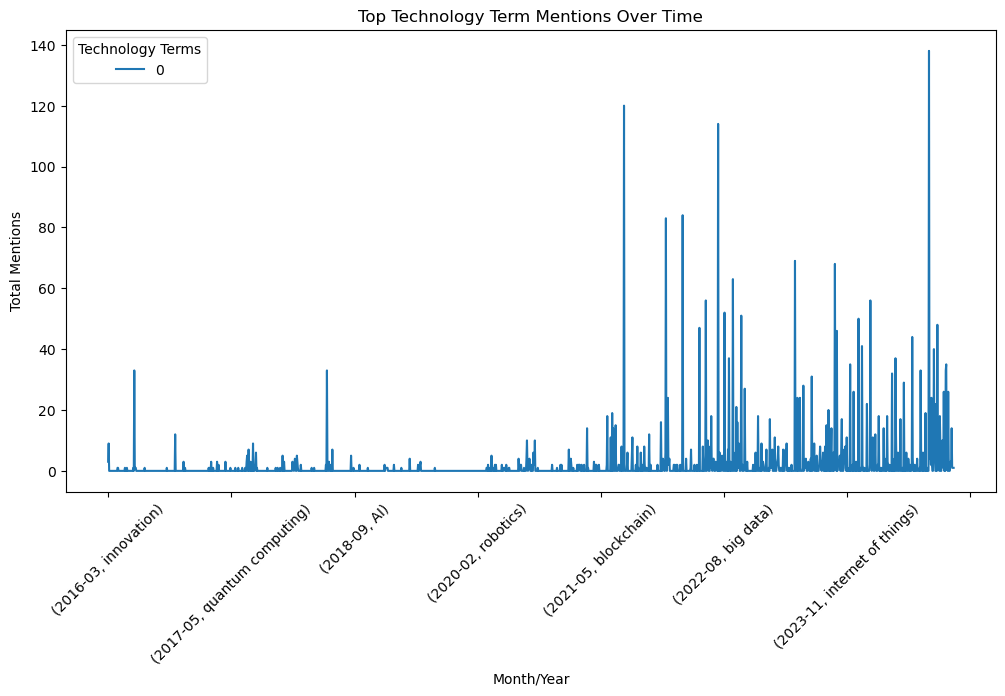

In [24]:
# Plot trend of technology term mentions over time for the top terms
top_terms = monthly_tech_df.sum().nlargest(10).index  # Select top 10 tech terms by total mentions
monthly_tech_df[top_terms].plot(figsize=(12, 6))
plt.title("Top Technology Term Mentions Over Time")
plt.xlabel("Month/Year")
plt.ylabel("Total Mentions")
plt.xticks(rotation=45)
plt.legend(title="Technology Terms")
plt.savefig("cn_articles_monthly_tech_terms.png", dpi=300)
plt.show()

In [25]:
# Vectorize the processed content
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['preprocessed_content'])

# Define and fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx + 1}: ", [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 1:  ['services', 'government', 'companies', 'new', 'technology', 'market', 'development', 'foreign', 'industry', 'china']
Topic 2:  ['million', 'market', '2022', '2023', 'rmb', 'billion', 'growth', 'china', 'year', 'percent']
Topic 3:  ['measures', 'new', 'kong', 'hong', 'chinese', 'companies', 'business', 'company', 'foreign', 'china']
Topic 4:  ['companies', 'countries', 'products', 'market', 'foreign', 'business', 'investment', 'trade', 'chinese', 'china']
Topic 5:  ['pi', 'companies', 'regulations', 'processing', 'protection', 'china', 'security', 'personal', 'data', 'information']


In [26]:
# NER Function
def get_entities(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    entities = []
    for chunk in chunked:
        if isinstance(chunk, Tree):
            entity = " ".join([token for token, pos in chunk.leaves()])
            entities.append(entity)
    return entities

In [27]:
# Apply NER and extract unique entities
data['entities'] = data['content'].apply(get_entities)
all_entities = [entity for sublist in data['entities'] for entity in sublist]
unique_entities = set(all_entities)

# Display some of the entities
print(f"Sample entities extracted: {list(unique_entities)[:20]}")

Sample entities extracted: ['IRCSs', 'France-China', 'Modern Service Industry', 'Extended Tax', 'Lessor', 'Commitment', 'COMMONWEALTH OF', 'Fast Tracking', 'Stock Appreciation Rights', 'Family Office', 'Host', 'Infrastructure Development', 'Operation Expectation Index', 'Resume Passport', 'Sumavision', 'Shen Yueyue', 'Employers Next Article China', 'CGN', 'Dialogue', 'International Green Energy Certification Center']


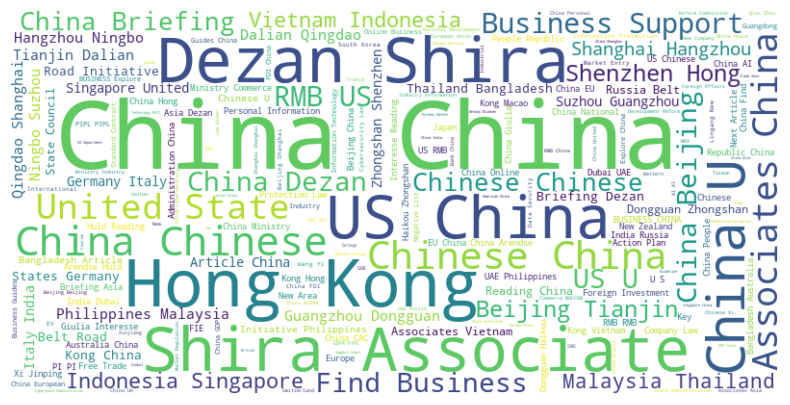

In [28]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_entities))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("cn_articles_wordcloud.png", dpi=300)
plt.show()